## EPI referenceless method using entropy as cost function 
###### Author: Zimu Huo
###### Date: 07.2022

Using entropy as a measurement to reduce the EPI ghost. First separate the data into even and odd images, then find the appropriate phase shift for odd or even echos to minimise entropy. 

I tried scipy optimization, it looks like the cost is concave(as expected). Hence, I'm brute forcing it

-------------------------------------------------------------------------
References

    [1] 
    Author:  S. Clare
    Title: Iterative Nyquist Ghost Correction for Single and Multi-shot EPI using an Entropy Measure
    Link: https://cds.ismrm.org/ismrm-2003/1041.pdf

In [1]:
import twixtools
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')
from util.twix import *
from tqdm.notebook import tqdm
import scipy
from util.fft import * 
from util.entropy import * 

In [2]:
import pickle
with open("../lib/SSEPI_data", "rb") as fp:   # Unpickling
    file = pickle.load(fp)
FIGSIZE = (10,6)
pha = file[0]['readouts']
phaflag=file[0]['flags']
data = file[1]['readouts']
dataflag = file[1]['flags']
print(data.shape)

(48, 128, 30)


In [3]:
recon = epi_phasecorrection_entropy(data)

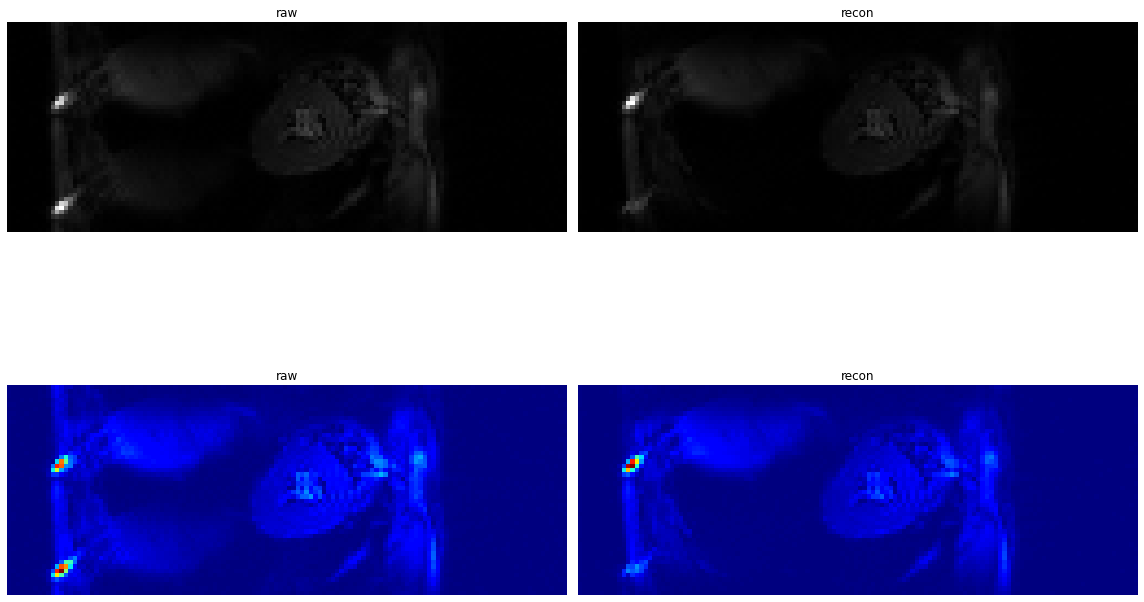

In [5]:
plt.figure(figsize =(16,12))
plt.subplot(221)
plt.title("raw")
plt.axis('off')
plt.imshow(np.abs(rsos(ifft2c(data))), cmap ="gray")
plt.subplot(222)
plt.axis('off')
plt.title("recon")
plt.imshow(np.abs(rsos(ifft2c(recon))), cmap ="gray")
plt.subplot(223)
plt.axis('off')
plt.title("raw")
plt.imshow(np.abs(rsos(ifft2c(data))), cmap ="jet")
plt.subplot(224)
plt.axis('off')
plt.title("recon")
plt.imshow(np.abs(rsos(ifft2c(recon))), cmap ="jet")
plt.tight_layout()
plt.savefig("EPI_entropy.png")